In [60]:
from EntityNameRetriever import EntityNameRetriever
from graph import graph_from_edgelist, remove_void_types
import networkx as nx
from CorpusManager import CorpusManager
import pickle
from utils import save_data_with_pickle, load_data_with_pickle
import time

In [61]:
# List of classes used to test the correctness of the workflow
LIST_OF_CLASSES = ['City', 'Mosque', 'Animal']
# PATH in which utility files are stored
PICKLES_PATH = '../../source_files/pickles/'

# PATH that refers to the file which let the building of the Ontology Graph
PATH_TO_EDGELIST = PICKLES_PATH + 'dbpedia_edgelist_no_closure.tsv'
# PATH to the corpus from which information are extracted
CORPUS_PATH = '/datahdd/vmanuel/ELMo/Corpora/shuffled_text_with_words'

In [62]:
try:
    G = load_data_with_pickle(PICKLES_PATH + 'graph')
except:
    G = graph_from_edgelist(PATH_TO_EDGELIST)
    save_data_with_pickle(PICKLES_PATH + 'graph', G)

# Check if the built graph is a tree (it should be a tree because we need to use an Ontology Tree)
print("the input graph is a tree: {}".format(nx.is_tree(G)))

the input graph is a tree: True


In [63]:
list_of_classes = [n for n in G.nodes()]


In [64]:
entity_dict = load_data_with_pickle(PICKLES_PATH + 'entity_dict')

In [65]:
void_types = [t for t, v in entity_dict.items() if v == []]

pruned_G = remove_void_types(G, void_types)
print("the pruned graph is a tree: {}".format(nx.is_tree(pruned_G)))

the pruned graph is a tree: True


In [66]:
len(void_types)

29

In [75]:
c = CorpusManager()
c.read_corpus(CORPUS_PATH, length = 1000)
c.create_all_entities(entity_dict, concepts=list_of_classes)

read input corpus


100%|██████████| 1000/1000 [00:00<00:00, 2250.37it/s]


In [76]:
lengths = [len(w.split(' ')) for w in c.all_entities]

In [77]:
import matplotlib.pyplot as plt

<BarContainer object of 17 artists>

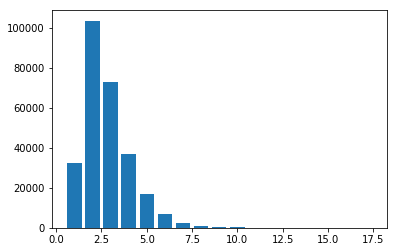

In [78]:
from collections import Counter
a = Counter(lengths)
plt.bar(a.keys(), a.values())

In [79]:
a

Counter({2: 103516,
         3: 72992,
         5: 17096,
         4: 36907,
         6: 7046,
         1: 32410,
         8: 968,
         7: 2458,
         12: 57,
         9: 448,
         10: 228,
         16: 4,
         11: 96,
         14: 12,
         15: 6,
         13: 9,
         17: 2})

## Fede fai andare tutte le celle ma guarda da qui

In [111]:
c.joined_corpus[575]

'kemah city us state texas southeast houston along west galveston bay the citys population located galveston county kemahs main industry shipping originally small fishing town city become tourist destination areas restaurants attractions contained within kemah entertainment district in fact kemah ranked top tourism spot greater houston area'

In [106]:
c.joined_corpus[930].find('summer olympics')

-1

In [107]:
original = load_data_with_pickle('../../source_files/pickles/word_occurrence_index')

In [108]:
original

{'': [(2, [328]),
  (3, [83]),
  (5, [130]),
  (6, [63]),
  (11, [73]),
  (12, [372]),
  (13, [357]),
  (31, [840]),
  (33, [104]),
  (40, [477]),
  (44, [130]),
  (46, [118]),
  (54, [442]),
  (58, [169]),
  (59, [157]),
  (65, [75]),
  (73, [529]),
  (74, [65]),
  (79, [7]),
  (81, [151]),
  (88, [871]),
  (91, [382]),
  (97, [277]),
  (100, [281]),
  (104, [82]),
  (107, [2241]),
  (110, [80]),
  (111, [750]),
  (115, [546]),
  (117, [111]),
  (118, [252]),
  (120, [494]),
  (124, [246]),
  (125, [28]),
  (127, [236]),
  (136, [25]),
  (142, [92]),
  (147, [206]),
  (149, [209]),
  (150, [141]),
  (151, [122]),
  (152, [227]),
  (155, [706]),
  (167, [735]),
  (169, [0]),
  (171, [22]),
  (179, [82]),
  (183, [7]),
  (184, [86]),
  (188, [164]),
  (190, [166]),
  (193, [118]),
  (197, [1012]),
  (201, [278]),
  (211, [110]),
  (213, [610]),
  (216, [5]),
  (217, [152]),
  (219, [77]),
  (220, [1450]),
  (225, [77]),
  (227, [82]),
  (229, [124]),
  (240, [122]),
  (249, [349]),
  (2

## a qui

In [44]:
# create a unique dict
a_dict = {k:v for elem in a for k,v in elem.items()}
found_entities = set(a_dict.keys())

found_entity_dict = {k: set(v).intersection(found_entities) for k,v in entity_dict.items() if set(v).intersection(found_entities)}

In [45]:
found_entity_dict

{'Settlement': {'bologna',
  'brooklyn',
  'ghent',
  'haikou',
  'koszalin',
  'la ceiba',
  'liverpool',
  'philadelphia',
  'stade'},
 'City': {'angul',
  'bologna',
  'brooklyn',
  'ghent',
  'haikou',
  'ilo',
  'kladno',
  'koszalin',
  'la ceiba',
  'liverpool',
  'metropolis',
  'philadelphia',
  'stade'},
 'Town': {'stade'},
 'Animal': {'gunda'},
 'Insect': {'gunda'},
 'Place': {'bologna',
  'brooklyn',
  'ghent',
  'haikou',
  'koszalin',
  'liverpool',
  'philadelphia'},
 'PopulatedPlace': {'bologna',
  'brooklyn',
  'ghent',
  'haikou',
  'koszalin',
  'la ceiba',
  'liverpool',
  'philadelphia',
  'stade'}}